# Logistic Regression

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression

In [ ]:
!cp '/content/drive/My Drive/data.csv' ./

In [ ]:
import pandas as pd
data = pd.read_csv('data.csv')

In [ ]:
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,target
0,0,0.823529,0.831373,0.839216,0.866667,0.850980,0.850980,0.843137,0.862745,0.847059,0.843137,0.850980,0.831373,0.847059,0.835294,0.843137,0.847059,0.862745,0.850980,0.854902,0.835294,0.850980,0.850980,0.847059,0.854902,0.835294,0.847059,0.827451,0.792157,0.713726,0.658824,0.854902,0.827451,0.823529,0.819608,0.839216,0.839216,0.827451,0.823529,0.835294,...,0.788235,0.815686,0.815686,0.811765,0.803922,0.827451,0.811765,0.792157,0.807843,0.796078,0.815686,0.823529,0.823529,0.827451,0.819608,0.827451,0.819608,0.823529,0.815686,0.815686,0.839216,0.823529,0.803922,0.784314,0.776471,0.788235,0.764706,0.776471,0.796078,0.800000,0.800000,0.807843,0.819608,0.835294,0.839216,0.831373,0.807843,0.819608,0.807843,0
1,1,0.874510,0.858824,0.843137,0.694118,0.674510,0.854902,0.839216,0.839216,0.874510,0.874510,0.843137,0.819608,0.823529,0.815686,0.854902,0.858824,0.839216,0.862745,0.827451,0.823529,0.827451,0.831373,0.780392,0.839216,0.854902,0.850980,0.862745,0.811765,0.858824,0.811765,0.858824,0.858824,0.870588,0.882353,0.898039,0.835294,0.800000,0.796078,0.807843,...,0.886275,0.866667,0.882353,0.874510,0.850980,0.843137,0.862745,0.843137,0.843137,0.854902,0.839216,0.831373,0.870588,0.862745,0.815686,0.854902,0.886275,0.905882,0.917647,0.803922,0.796078,0.815686,0.811765,0.815686,0.819608,0.807843,0.862745,0.835294,0.835294,0.815686,0.831373,0.866667,0.815686,0.807843,0.835294,0.847059,0.847059,0.815686,0.839216,0
2,2,0.701961,0.674510,0.662745,0.650980,0.647059,0.690196,0.678431,0.647059,0.674510,0.666667,0.654902,0.709804,0.694118,0.654902,0.658824,0.721569,0.694118,0.658824,0.658824,0.643137,0.678431,0.686275,0.682353,0.678431,0.701961,0.682353,0.717647,0.678431,0.690196,0.698039,0.666667,0.701961,0.690196,0.705882,0.701961,0.674510,0.658824,0.658824,0.694118,...,0.670588,0.674510,0.635294,0.654902,0.658824,0.556863,0.549020,0.670588,0.701961,0.690196,0.705882,0.717647,0.674510,0.647059,0.686275,0.690196,0.666667,0.631373,0.682353,0.670588,0.631373,0.647059,0.658824,0.666667,0.686275,0.674510,0.678431,0.670588,0.678431,0.713726,0.709804,0.682353,0.682353,0.658824,0.666667,0.682353,0.686275,0.698039,0.635294,0
3,3,0.729412,0.729412,0.768627,0.741176,0.713726,0.768627,0.764706,0.800000,0.823529,0.701961,0.698039,0.760784,0.784314,0.839216,0.800000,0.705882,0.639216,0.772549,0.823529,0.800000,0.760784,0.780392,0.854902,0.701961,0.682353,0.666667,0.686275,0.717647,0.756863,0.705882,0.694118,0.756863,0.815686,0.658824,0.713726,0.729412,0.792157,0.749020,0.721569,...,0.776471,0.768627,0.725490,0.682353,0.721569,0.760784,0.741176,0.725490,0.780392,0.772549,0.737255,0.737255,0.745098,0.800000,0.686275,0.776471,0.792157,0.756863,0.733333,0.698039,0.800000,0.831373,0.658824,0.658824,0.690196,0.682353,0.682353,0.682353,0.654902,0.701961,0.666667,0.709804,0.741176,0.772549,0.811765,0.709804,0.639216,0.635294,0.705882,0
4,4,0.796078,0.788235,0.803922,0.764706,0.741176,0.756863,0.749020,0.792157,0.792157,0.776471,0.792157,0.811765,0.784314,0.784314,0.803922,0.800000,0.823529,0.796078,0.756863,0.752941,0.745098,0.756863,0.768627,0.756863,0.733333,0.764706,0.768627,0.756863,0.745098,0.764706,0.788235,0.784314,0.784314,0.760784,0.768627,0.772549,0.788235,0.780392,0.772549,...,0.756863,0.729412,0.749020,0.752941,0.772549,0.752941,0.764706,0.760784,0.776471,0.741176,0.772549,0.768627,0.760784,0.745098,0.764706,0.756863,0.733333,0.756863,0.768627,0.749020,0.756863,0.792157,0.788235,0.780392,0.784314,0.764706,0.776471,0.733333,0.749020,0.760784,0.752941,0.788235,0.764706,0.776471,0.760784,0.737255,0.752941,0.741176,0.729412,0


In [ ]:
data = data.drop('Unnamed: 0',axis=1)

In [ ]:
target = data['target']
data = data.drop('target',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state = 77)
print ("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

X_train:  28000
X_test:  12000
y_train:  28000
y_test:  12000


In [ ]:
# Gridsearch 
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-4,-1,4)}
# Add "solver": ["newton-cg", "lbfgs", "liblinear", "sag"]
log_reg = LogisticRegression(random_state=77,max_iter = 10000)
log_reg_cv = GridSearchCV(log_reg,grid,cv=5)
log_reg_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=77, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.0001, 0.001 , 0.01  , 0.1   ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print("Best Hyperparameter: ",log_reg_cv.best_params_)
print("Accuracy: ",log_reg_cv.best_score_)

Best Hyperparameter:  {'C': 0.1}
Accuracy:  0.9026071428571429


In [ ]:
grid1={"solver": ["newton-cg", "lbfgs", "liblinear", "sag"]}
log_reg1 = LogisticRegression(C=0.1,random_state=77,max_iter = 10000)
log_reg_cv1 = GridSearchCV(log_reg1,grid1,cv=5)
log_reg_cv1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=0.1, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=77, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print("Best Hyperparameter: ",log_reg_cv1.best_params_)
print("Accuracy: ",log_reg_cv1.best_score_)

Best Hyperparameter:  {'solver': 'liblinear'}
Accuracy:  0.9041428571428571


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=77, max_iter=10000).fit(X_train, y_train)
y_locv = clf.predict(X_test)

5

Logistic Regression accuracy score:  0.90425
Logistic Regression matrix heatmap: 



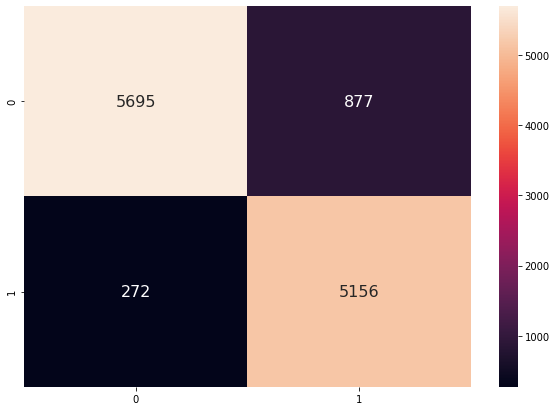

Logistic Regression classification report 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      5967
           1       0.95      0.85      0.90      6033

    accuracy                           0.90     12000
   macro avg       0.91      0.90      0.90     12000
weighted avg       0.91      0.90      0.90     12000



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
print('Logistic Regression accuracy score: ',accuracy_score(y_test,y_locv))
print('Logistic Regression matrix heatmap: \n')
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_locv, y_test),annot=True, annot_kws={"size": 16},fmt = "d")
plt.show()
print('Logistic Regression classification report \n',classification_report(y_test, y_locv))

In [ ]:
# Without CV -> Vanilla LR
from sklearn.linear_model import LogisticRegression
lo = LogisticRegression(max_iter=10000,C=0.1,solver='liblinear')
lo.fit(X_train,y_train)
y_lo = lo.predict(X_test)

In [ ]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

np.random.seed(0)

train_scores, valid_scores = validation_curve(LogisticRegression(max_iter=10000), X_train, y_train,"C",np.logspace(-7, 3, 3),cv=5)
train_scores

KeyboardInterrupt: ignored

Logistic Regression accuracy score:  0.9043333333333333
Logistic Regression matrix heatmap: 



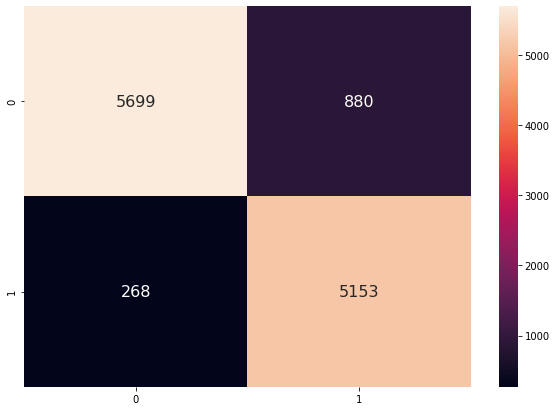

Logistic Regression classification report 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      5967
           1       0.95      0.85      0.90      6033

    accuracy                           0.90     12000
   macro avg       0.91      0.90      0.90     12000
weighted avg       0.91      0.90      0.90     12000



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
print('Logistic Regression accuracy score: ',accuracy_score(y_test,y_lo))
print('Logistic Regression matrix heatmap: \n')
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_lo, y_test),annot=True, annot_kws={"size": 16},fmt = "d")
plt.show()
print('Logistic Regression classification report \n',classification_report(y_test, y_lo))